# Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2 as cv
from sklearn import linear_model
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Helping Functions

In [3]:
def plot_image(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show(block = True)

In [4]:
def display_image(image):
    cv.imshow('image', image)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [5]:
def plot_graph(image, i = 0):
    sum_ = image.sum(axis = i)
    
    plt.figure(figsize = (15, 8))
    x = list(range(len(sum_)))
    y = list(sum_)
    plt.scatter(x, y, alpha = 0.5)
    plt.show()

# Loading

In [6]:
r_image = cv.imread('page03.jpg')
gray = cv.cvtColor(r_image, cv.COLOR_BGR2GRAY)

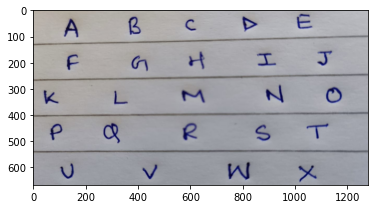

In [7]:
plot_image(r_image)

# Preprocessing

In [8]:
def preprocess_image(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    blur = cv.bilateralFilter(gray, 3, 75, 75)
    
    thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

    k = 3
    kernal = np.ones((k, k), np.uint8)
    dilate = cv.dilate(thresh, kernal, iterations = 1)
    
    k = 1
    kernal = np.ones((k, k), np.uint8)
    erode = cv.erode(dilate, kernal, iterations = 1)
    
    return erode

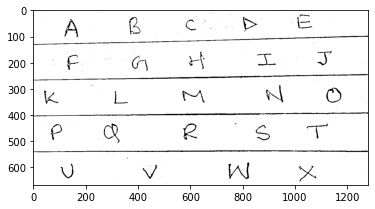

In [9]:
preprocess_imaged = preprocess_image(r_image)
plot_image(preprocess_imaged)
# display_image(preprocess_imaged)

# line extraction

In [10]:
def line_extraction(preprocess_imaged, r_image):
    gray = cv.cvtColor(r_image, cv.COLOR_BGR2GRAY)
    
    # edges of image
    edges = cv.Canny(preprocess_imaged, 0, 125, apertureSize = 3)
    
    # probability of lines
    lines = cv.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength = int(r_image.shape[1] * 0.0002))
    
    # y val of all lines
    Y = [0,]
    for line in lines:
        x1, y1, x2, y2 = line[0]
#         cv.line(r_image, (x1, y1), (x2, y2), (0,255,0), 1)
        Y.append(y1)
    Y.append(gray.shape[0])
    Y = sorted(Y)

    # slope for y
    Y_m = []
    for i in range(len(Y)):
        if i == len(Y)-1:
            break
        Y_m.append(Y[i + 1] - Y[i])
    
    # seprerate the outlier and data
    LR = linear_model.LinearRegression()
    LR.fit(np.array(range(len(Y_m))).reshape(-1, 1), np.array(Y_m))
    m = LR.coef_ 
    c = LR.intercept_
    
    # assigning to outliers to  Y
    Y_bool = (np.array(Y_m) - (m * np.array(range(len(Y_m)))) - c) > 0
    Y_bool = np.where(Y_bool>0)[0]

    line_extractions = []
    for i in range(len(Y_bool)):
        line_extractions.append(r_image[:][Y[Y_bool[i]] : Y[Y_bool[i] + 1]])
    
    return line_extractions, Y, edges, lines, r_image

In [11]:
line_extractions, Y, edges, lines, r_image = line_extraction(preprocess_imaged, r_image)

In [12]:
# display_image(edges,)

In [13]:
# display_image(r_image,)

In [14]:
len(Y)

164

<AxesSubplot:>

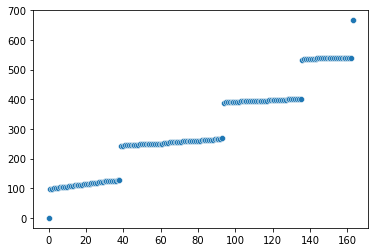

In [15]:
sns.scatterplot(range(len(Y)), Y)

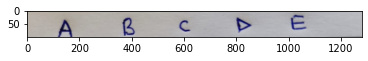

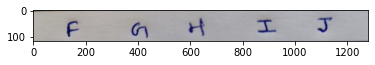

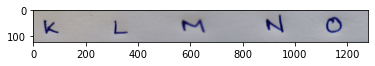

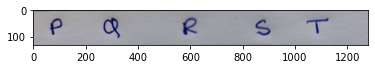

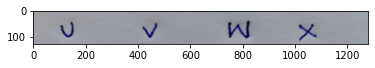

In [16]:
for line in line_extractions:
    plot_image(line)

In [17]:
line1 = line_extractions[0]

In [18]:
cv.imwrite('line1.jpg', line1)

True